In [1]:
import warnings
warnings.filterwarnings('ignore')


# The LIF model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod):
    """
    Simulates the Leaky Integrate-and-Fire model of a neuron using Forward Euler method.
    
    Parameters:
        tau_m (float): membrane time constant (in seconds)
        R_m (float): membrane resistance (in ohms)
        V_rest (float): resting potential (in volts)
        I (callable): input current function of time (in amperes)
        V_init (float): initial membrane potential (in volts)
        dt (float): time step (in seconds)
        t_final (float): final simulation time (in seconds)
        
    Returns:
        t (array): time values (in seconds)
        V (array): membrane potential values (in volts)
    """
    
    # Initialize time and voltage arrays
    t = np.arange(0, t_final, dt)
    V = np.zeros_like(t)
    V[0] = V_init
    
    if numMethod == 'FE':
        # Numerical integration using Forward Euler method
        for i in range(1, len(t)):
            dVdt = (-(V[i-1] - V_rest) + R_m * I(t[i-1])) / tau_m
            V[i] = V[i-1] + dVdt * dt

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
                
    if numMethod == 'BE':
        # Numerical integration using Backward Euler method
        for i in range(1, len(t)):
            dVdt=((V_rest-V[i-1] + R_m*I(t[i]))/tau_m) / (1+dt/tau_m)
            V[i] = V[i-1] + dVdt * dt

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
                
    if numMethod == 'Heun':
        # Numerical integration using Heun's method
        for i in range(1, len(t)):
            k1 = (-(V[i-1] - V_rest) + R_m * I(t[i-1])) / tau_m
            k2 = (-(V[i-1] + dt*k1*tau_m - V_rest) + R_m * I(t[i])) / tau_m
            V[i] = V[i-1] + 0.5*dt*(k1 + k2)

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
                
    if numMethod == 'RK4':
        # Numerical integration using Runge-Kutta 4 method
        for i in range(1, len(t)):
            k1 = dt * ((-(V[i-1] - V_rest) + R_m * I(t[i-1])) / tau_m)
            k2 = dt * ((-(V[i-1] + k1 / 2 - V_rest) + R_m * I(t[i-1] + dt / 2)) / tau_m)
            k3 = dt * ((-(V[i-1] + k2 / 2 - V_rest) + R_m * I(t[i-1] + dt / 2)) / tau_m)
            k4 = dt * ((-(V[i-1] + k3 - V_rest) + R_m * I(t[i-1] + dt)) / tau_m)

            V[i] = V[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
            
    
    return t, V



# Generalities

## LIF with Forward Euler Method (explicit)

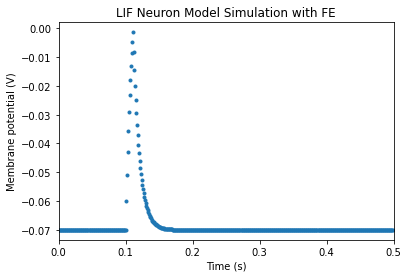

500

In [3]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'FE'

# Simulate LIF model with Forward Euler method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()

len(V)

## LIF with Backward Euler Method (implicit)

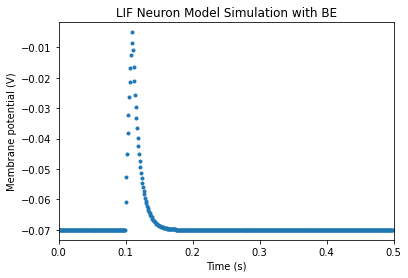

In [4]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'BE'

# Simulate LIF model with Backward Euler method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()


## LIF with Heun Method (explicit)

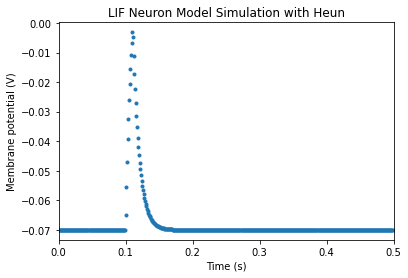

In [5]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'Heun'
# Simulate LIF model with Heun's method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()


## LIF with RK4 Method (explicit)

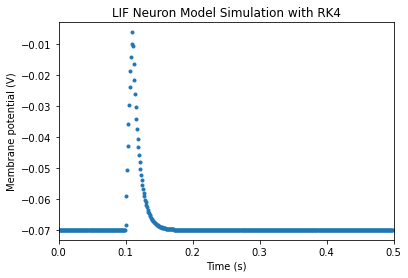

In [6]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'RK4'

# Simulate LIF model with Runge-Kutta 4 method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()


# Comparison 

## Computational time

### one-input-current

In [7]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  

In [8]:
# dt di riferimento 0.001
import time

dt = 0.001
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,10), "seconds")




FE time taken:  0.0009970665 seconds
BE time taken:  0.0009975433 seconds
Heun time taken:  0.0010294914 seconds
RK4 time taken:  0.0029728413 seconds


In [9]:
# un decimo di dt di riferimento
import time

dt = 0.001/10
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")



FE time taken:  0.00951 seconds
BE time taken:  0.011668 seconds
Heun time taken:  0.005651 seconds
RK4 time taken:  0.050868 seconds


In [10]:
# un centesimo di dt di riferimento

import time

dt = 0.001/100
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")

FE time taken:  0.083547 seconds
BE time taken:  0.116506 seconds
Heun time taken:  0.147873 seconds
RK4 time taken:  0.329783 seconds


In [11]:
# un millesimo di dt di riferimento

import time

dt = 0.001/1000
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")

FE time taken:  0.744958 seconds
BE time taken:  0.791944 seconds
Heun time taken:  1.406544 seconds
RK4 time taken:  3.559211 seconds


### multiple-input-current

In [12]:
def I(t):
    pulse_dur = 0.01 # duration of each pulse in seconds
    pulse_interval = 0.05 # time interval between pulses in seconds
    num_pulses = 15 # number of pulses
    
    pulse_start_times = np.arange(0.1, 0.1 + num_pulses*pulse_interval, pulse_interval)
    
    for start_time in pulse_start_times:
        if t >= start_time and t <= start_time + pulse_dur:
            return 1e-9 # 1nA current input for pulse duration
    return 0.0 # no input current otherwise


FE time taken:  0.020244 seconds


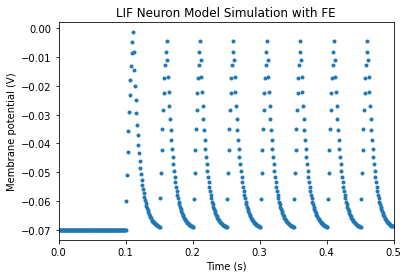

BE time taken:  0.004856 seconds


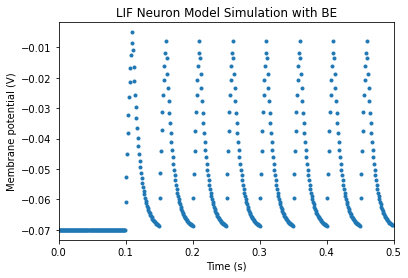

Heun time taken:  0.006326 seconds


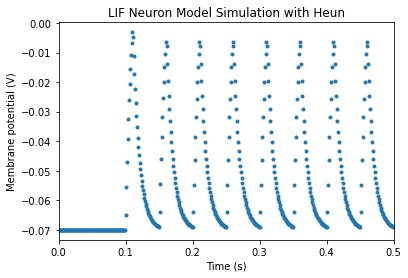

RK4 time taken:  0.012701 seconds


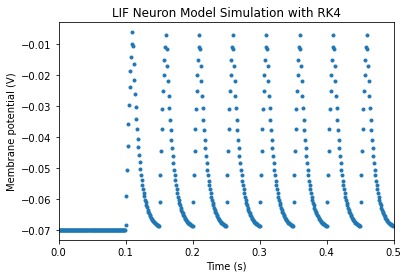

In [13]:
# given the same dt we look the multiple input current effect

import time

dt = 0.001
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")
    # Plot voltage trace
    plt.plot(t, V, '.')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane potential (V)')
    plt.title('LIF Neuron Model Simulation with ' + numMethod)
    plt.xlim(0, t_final)
    plt.show()

FE time taken:  0.071022 seconds


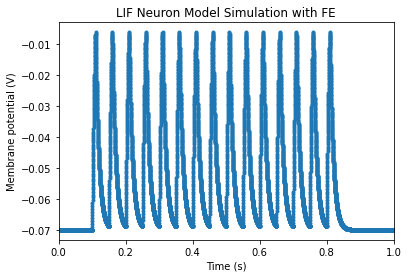

BE time taken:  0.056845 seconds


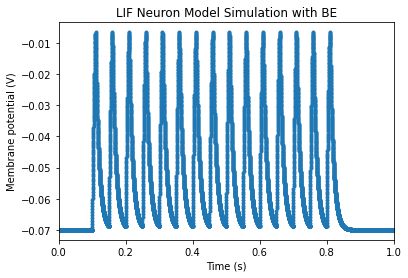

Heun time taken:  0.094151 seconds


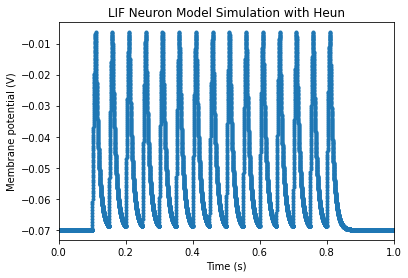

RK4 time taken:  0.259153 seconds


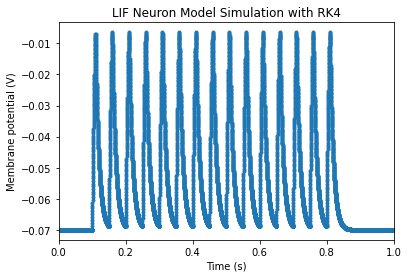

In [14]:
# decimal of the ref dt we look the multiple input current effect

import time

dt = 0.001/10
t_final = 1
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")
    # Plot voltage trace
    plt.plot(t, V, '.')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane potential (V)')
    plt.title('LIF Neuron Model Simulation with ' + numMethod)
    plt.xlim(0, t_final)
    plt.show()

### overview

In [15]:
# range of different dt and check the computational time

t_final = 1
TIME = []
for dt in np.linspace(0.001,0.001/100, 100):
    for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
        start_time = time.time()    
        t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
        end_time = time.time()
        time_taken = end_time - start_time
        TIME += [[numMethod, dt, time_taken]]
        #print(numMethod + " time taken: ", round(time_taken,6), "seconds")

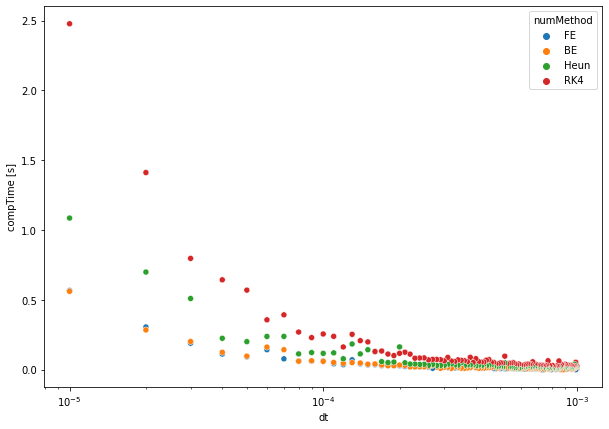

In [16]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(TIME, columns=['numMethod', 'dt', 'compTime [s]'])

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='dt', y='compTime [s]', hue='numMethod')

plt.xscale('log')
#plt.yscale('log')
#plt.savefig('./computation_time.jpeg', dpi=300, background='white')

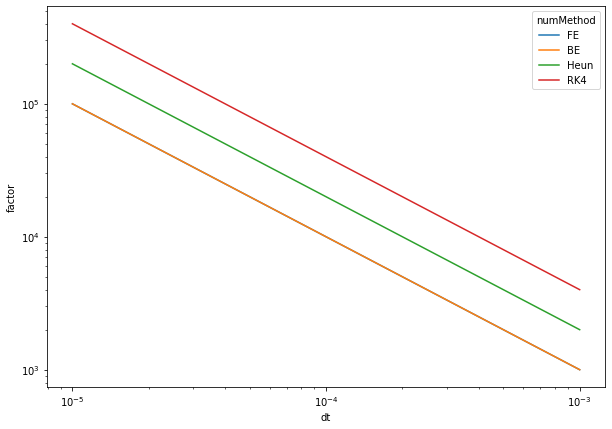

In [17]:
FACTOR = []
for dt in np.linspace(0.001,0.001/100, 100):
    for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
        if numMethod == 'FE' or 'BE': EXP=1
        if numMethod == 'Heun': EXP=2
        if numMethod == 'RK4': EXP=4
        FACTOR += [[numMethod, dt, 1/dt*EXP]]

plt.figure(figsize=(10, 7))
sns.lineplot(data=pd.DataFrame(data=FACTOR, columns=['numMethod', 'dt', 'factor']), x='dt', y='factor', hue='numMethod')
plt.xscale('log')
plt.yscale('log')

## Accuracy

In [18]:
def I(t):
    pulse_dur = 0.01 # duration of each pulse in seconds
    pulse_interval = 0.1 # time interval between pulses in seconds
    num_pulses = 100 # number of pulses
    
    pulse_start_times = np.arange(1, 0.1 + num_pulses*pulse_interval, pulse_interval)
    
    for start_time in pulse_start_times:
        if t >= start_time and t <= start_time + pulse_dur:
            return 1e-9 # 1nA current input for pulse duration
    return 0.0 # no input current otherwise

t_final=11 # secondS

### Reference solution

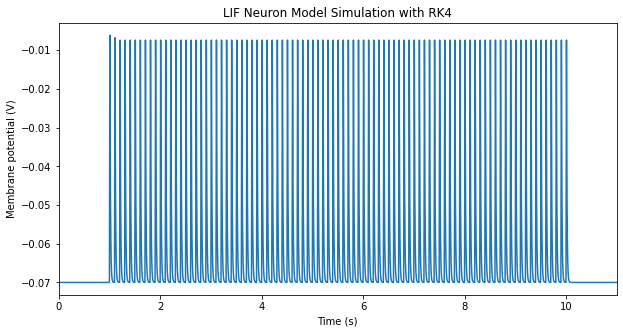

In [19]:
dt = 0.001
for numMethod in ['RK4']:
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

plt.figure(figsize=(10, 5))
plt.plot(t, V)#, ':')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()

### Test

In [20]:
# Reference solution
ref_t, ref_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'RK4')

# Numerical solution alternatives
fe_t, fe_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'FE')
be_t, be_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'BE')
heun_t, heun_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'Heun')

# MSE and MAE
fe_mse = np.mean((fe_V - ref_V)**2)
be_mse = np.mean((be_V - ref_V)**2)
heun_mse = np.mean((heun_V - ref_V)**2)

fe_mae = np.max(np.abs(fe_V - ref_V))
be_mae = np.max(np.abs(be_V - ref_V))
heun_mae = np.max(np.abs(heun_V - ref_V))


In [21]:
# MSE sorted
mse_values = {'FE': fe_mse, 'BE': be_mse, 'Heun': heun_mse}
sorted_mse = sorted(mse_values.items(), key=lambda x: x[1], reverse=True)

print("MSE (sorted):")
print(" ")
for method, mse in sorted_mse:
    print(f"{method}: {mse:.10f}")
    
print(' ')

MSE (sorted):
 
FE: 0.0000031956
Heun: 0.0000005493
BE: 0.0000002347
 


In [22]:
# MAE sorted
mae_values = {'FE': fe_mae, 'BE': be_mae, 'Heun': heun_mae}
sorted_mae = sorted(mae_values.items(), key=lambda x: x[1], reverse=True)

print("MAE (sorted):")
print(" ")
for method, mae in sorted_mae:
    print(f"{method}: {mae:.5f}")

MAE (sorted):
 
FE: 0.00991
BE: 0.00910
Heun: 0.00646


# Other Neural Models

## Hodgkin-Huxley Model

Ref: https://github.com/swharden/pyHH 

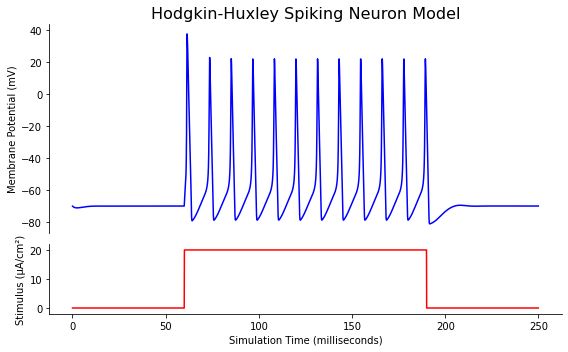

In [23]:
import matplotlib.pyplot as plt
import numpy as np


class HHModel:
    """The HHModel tracks conductances of 3 channels to calculate Vm"""

    class Gate:
        """The Gate object manages a channel's kinetics and open state"""
        alpha, beta, state = 0, 0, 0

        def update(self, deltaTms):
            alphaState = self.alpha * (1-self.state)
            betaState = self.beta * self.state
            self.state += deltaTms * (alphaState - betaState)

        def setInfiniteState(self):
            self.state = self.alpha / (self.alpha + self.beta)

    ENa, EK, EKleak = 115, -12, 10.6
    gNa, gK, gKleak = 120, 36, 0.3
    m, n, h = Gate(), Gate(), Gate()
    Cm = 1

    def __init__(self, startingVoltage=0):
        self.Vm = startingVoltage
        self.UpdateGateTimeConstants(startingVoltage)
        self.m.setInfiniteState()
        self.n.setInfiniteState()
        self.n.setInfiniteState()

    def UpdateGateTimeConstants(self, Vm):
        """Update time constants of all gates based on the given Vm"""
        self.n.alpha = .01 * ((10-Vm) / (np.exp((10-Vm)/10)-1))
        self.n.beta = .125*np.exp(-Vm/80)
        self.m.alpha = .1*((25-Vm) / (np.exp((25-Vm)/10)-1))
        self.m.beta = 4*np.exp(-Vm/18)
        self.h.alpha = .07*np.exp(-Vm/20)
        self.h.beta = 1/(np.exp((30-Vm)/10)+1)

    def UpdateCellVoltage(self, stimulusCurrent, deltaTms):
        """calculate channel currents using the latest gate time constants"""
        INa = np.power(self.m.state, 3) * self.gNa * \
            self.h.state*(self.Vm-self.ENa)
        IK = np.power(self.n.state, 4) * self.gK * (self.Vm-self.EK)
        IKleak = self.gKleak * (self.Vm-self.EKleak)
        Isum = stimulusCurrent - INa - IK - IKleak
        self.Vm += deltaTms * Isum / self.Cm

    def UpdateGateStates(self, deltaTms):
        """calculate new channel open states using latest Vm"""
        self.n.update(deltaTms)
        self.m.update(deltaTms)
        self.h.update(deltaTms)

    def Iterate(self, stimulusCurrent=0, deltaTms=0.05):
        self.UpdateGateTimeConstants(self.Vm)
        self.UpdateCellVoltage(stimulusCurrent, deltaTms)
        self.UpdateGateStates(deltaTms)
        
        """
        The Euler method is used in the UpdateGate method of the Gate class to update the state 
        of the channel's kinetics and open state. Specifically, the Gate object tracks the alpha 
        and beta conductances and the state of the channel. 
        The update method calculates the alphaState and 
        betaState based on the current alpha, beta, and state, and 
        then updates the state based on the time step deltaTms and the difference 
        between alphaState and betaState. This is an explicit Euler update of the state of the gate.
        """

if __name__ == "__main__":
    hh = HHModel()
    pointCount = 5000
    voltages = np.empty(pointCount)
    times = np.arange(pointCount) * 0.05
    stim = np.zeros(pointCount)
    stim[1200:3800] = 20  # create a square pulse

    for i in range(len(times)):
        hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
        voltages[i] = hh.Vm
        # note: you could also plot hh's n, m, and k (channel open states)

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                 gridspec_kw={'height_ratios': [3, 1]})

    ax1.plot(times, voltages - 70, 'b')
    ax1.set_ylabel("Membrane Potential (mV)")
    ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(bottom=False)

    ax2.plot(times, stim, 'r')
    ax2.set_ylabel("Stimulus (µA/cm²)")
    ax2.set_xlabel("Simulation Time (milliseconds)")
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    plt.margins(0, 0.1)
    plt.tight_layout()


## Izhikevich Model

In [24]:
#e = Excitatory neurons, i = inhibitory neurons
Ne = 800
Ni = 202
number_neurons = Ne + Ni
time_steps = 1000

re = np.random.rand(Ne, 1)
ri = np.random.rand(Ni, 1)

#First array of np.concatenate is the Excitatory neuron parameters, second part is the inhibitory neurons
a = np.concatenate([0.02 * np.ones((Ne, 1)), 0.02 + 0.08 * ri])
b = np.concatenate([0.2 * np.ones((Ne, 1)), 0.25 - 0.05 * ri])
c = np.concatenate([-65 + 15 * re**2, -65 * np.ones((Ni, 1))])
d = np.concatenate([8 - 6 * re**2, 2 * np.ones((Ni, 1))])
S = np.concatenate([0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni)], axis = 1)

v = -65 * np.ones((Ne + Ni, 1))
u = b * -65
neurons_that_fired_across_time = []
voltage_across_time = []


#The numerical method used in this code snippet is the explicit Euler method
for t in range(1, time_steps + 1): 
  # The Input Voltage
  I = np.concatenate([5 * np.random.rand(Ne, 1), 2 * np.random.rand(Ni, 1)])

  # When voltage goes above 30 mV, we find the index, and append it to fired,
  # then reset the membrane potnetial and membrane recovery variable
  neurons_that_fired = np.where(v > 30)
  voltage_across_time.append(float(v[10]))
  neurons_that_fired_across_time.append([t + 0 * neurons_that_fired[0], neurons_that_fired[0]])

  for i in neurons_that_fired[0]:
    v[i] = c[i]
    u[i] += d[i]
  
  I += np.expand_dims(np.sum(S[:, neurons_that_fired[0]], axis = 1), axis = 1)
  # We have to do 0.5ms increments for numerical stability (try change it!)
  v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
  v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
  u = u + a * (b * v - u)

voltage_across_time = np.array(voltage_across_time)

time = np.dot(
    np.arange(time_steps).reshape(time_steps, 1), 
    np.ones(number_neurons).reshape(1, number_neurons))

firing_map = []
for t in range(time_steps):
  neurons_on_or_off = [None] * number_neurons

  for fired_neuron in np.array(neurons_that_fired_across_time)[t,1]:
    neurons_on_or_off[fired_neuron] = fired_neuron

  firing_map.append(neurons_on_or_off)

firing_map = np.array(firing_map)

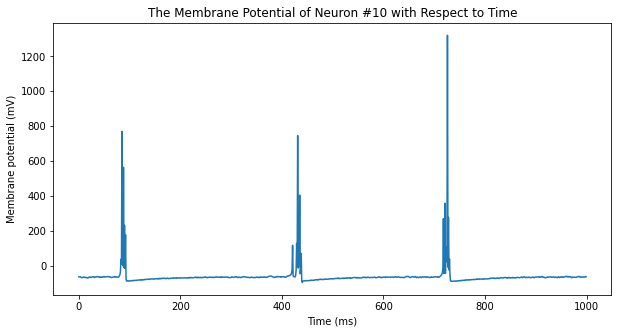

In [25]:
plt.figure(figsize=(10,5))
plt.title("The Membrane Potential of Neuron #10 with Respect to Time")
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.plot(np.arange(time_steps), voltage_across_time);
plt.show()